In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2
import thinkplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, log_loss, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import binarize


df1 = pd.read_csv("Edmonton_Area_Air_Quality_Readings__2015.csv")
df1.head(1)

,Row ID,Monitoring Station Name,Parameter Measured,Average Daily Value,Unit of Measure,Date Measured,Latitude,Longitude,Geo Location
0,Tomahawk-2015-01-01-Ozone-0.0357,Tomahawk,Ozone,0.0357,ppm,"Jan 01, 2015",53.372436,-114.768629,POINT (-114.7686293 53.3724355)


In [2]:
df_1=df1[df1["Parameter Measured"]=="Carbon Monoxide"]
df_1.value_counts().sum()

1423

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93935 entries, 0 to 93934
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Row ID                   93935 non-null  object 
 1   Monitoring Station Name  93935 non-null  object 
 2   Parameter Measured       93935 non-null  object 
 3   Average Daily Value      93935 non-null  float64
 4   Unit of Measure          89492 non-null  object 
 5   Date Measured            93935 non-null  object 
 6   Latitude                 93935 non-null  float64
 7   Longitude                93935 non-null  float64
 8   Geo Location             93935 non-null  object 
dtypes: float64(3), object(6)
memory usage: 6.5+ MB


In [83]:
df_1.head(5)

,Row ID,Monitoring Station Name,Parameter Measured,Average Daily Value,Unit of Measure,Date Measured,Latitude,Longitude,Geo Location
82,Fort Saskatchewan-92 St and 96 Ave-2015-01-01-...,Fort Saskatchewan-92 St and 96 Ave,Carbon Monoxide,0.2000,ppm,"Jan 01, 2015",53.698756,-113.222831,POINT (-113.222831 53.698756)
151,Edmonton Central-2015-01-01-Carbon Monoxide-0....,Edmonton Central,Carbon Monoxide,0.1833,ppm,"Jan 01, 2015",53.544453,-113.498842,POINT (-113.498842 53.544453)
162,Edmonton East-2015-01-01-Carbon Monoxide-0.2083,Edmonton East,Carbon Monoxide,0.2083,ppm,"Jan 01, 2015",53.548139,-113.368194,POINT (-113.368194 53.548139)
179,Edmonton South-2015-01-01-Carbon Monoxide-0.2000,Edmonton South,Carbon Monoxide,0.2000,ppm,"Jan 01, 2015",53.500139,-113.526056,POINT (-113.526056 53.500139)
316,Fort Saskatchewan-92 St and 96 Ave-2015-01-02-...,Fort Saskatchewan-92 St and 96 Ave,Carbon Monoxide,0.1304,ppm,"Jan 02, 2015",53.698756,-113.222831,POINT (-113.222831 53.698756)


In [84]:
df_1_new = df1[['Average Daily Value','Parameter Measured','Date Measured']]
#['Parameter Measured']=="Carbon Monoxide"]

In [85]:
df_1_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93935 entries, 0 to 93934
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Average Daily Value  93935 non-null  float64
 1   Parameter Measured   93935 non-null  object 
 2   Date Measured        93935 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.2+ MB


In Edmonton, the acceptable level of carbon monoxide (CO) in the air is determined by Alberta Environment and Parks. According to their guidelines, the maximum allowable concentration of CO in outdoor air is 30 parts per million (ppm) for an 8-hour time-weighted average and 40 ppm for a 1-hour average.

In [86]:
df_1_CO=df_1_new[df_1_new['Parameter Measured']=="Carbon Monoxide"]
df_1_CO.head(5)

,Average Daily Value,Parameter Measured,Date Measured
82,0.2000,Carbon Monoxide,"Jan 01, 2015"
151,0.1833,Carbon Monoxide,"Jan 01, 2015"
162,0.2083,Carbon Monoxide,"Jan 01, 2015"
179,0.2000,Carbon Monoxide,"Jan 01, 2015"
316,0.1304,Carbon Monoxide,"Jan 02, 2015"


c:\Users\shikh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



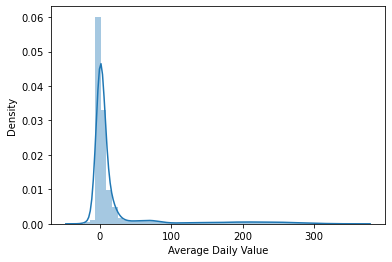

In [88]:
variable = df_1_new["Average Daily Value"]
sns.distplot(variable)
# Show the plot
plt.show()

In [4]:
df1['Parameter Measured']

0                           Ozone
1                    Nitric Oxide
2                    Nitric Oxide
3                Nitrogen Dioxide
4         Outdoor Air Temperature
                   ...           
93930             Sulphur Dioxide
93931          Total Hydrocarbons
93932    Total Oxides Of Nitrogen
93933              Wind Direction
93934                  Wind Speed
Name: Parameter Measured, Length: 93935, dtype: object

In [89]:
df_1_CO.head(1)

,Average Daily Value,Parameter Measured,Date Measured
82,0.2,Carbon Monoxide,"Jan 01, 2015"


In [114]:
import plotly.express as px

fig = px.bar(df_1_CO, x='Date Measured', y='Average Daily Value', title='Carbon Monooxide level')
fig.show()


In [91]:
df1.head(1)

,Row ID,Monitoring Station Name,Parameter Measured,Average Daily Value,Unit of Measure,Date Measured,Latitude,Longitude,Geo Location
0,Tomahawk-2015-01-01-Ozone-0.0357,Tomahawk,Ozone,0.0357,ppm,"Jan 01, 2015",53.372436,-114.768629,POINT (-114.7686293 53.3724355)


In [92]:
df1['Parameter Measured'].unique()

array(['Ozone', 'Nitric Oxide', 'Nitrogen Dioxide',
       'Outdoor Air Temperature', 'PM2.5 Mass', 'Relative Humidity',
       'Std. Dev. of Wind Direction', 'Std. Dev. of Wind Speed',
       'Sulphur Dioxide', 'Total Oxides Of Nitrogen', 'Wind Direction',
       'Wind Speed', 'Benzene', 'Ethylbenzene', 'Hydrogen Sulphide',
       'm,p-Xylene', 'o-Xylene', 'Styrene', 'Toluene',
       'Catch of Standard Collector', 'Delta Temperature',
       'Photosynthetic Active Radiation', 'Solar Radiation',
       'Total Hydrocarbons', 'Air Quality Index', 'Ammonia',
       'Carbon Monoxide', 'Methane', 'Non-methane Hydrocarbons',
       'Ethylene', 'PM10 Mass', 'Outdoor Air Temperature at 10m'],
      dtype=object)

In [93]:
df_1_NO=df_1_new[df_1_new['Parameter Measured']=="Nitric Oxide"]

In [115]:
# for nitric Oxide
fig = px.bar(df_1_NO, x='Date Measured', y='Average Daily Value',title='Nitirc Oxide Level')
fig.show()


In [95]:
df_1_CO.head(2)

,Average Daily Value,Parameter Measured,Date Measured
82,0.2000,Carbon Monoxide,"Jan 01, 2015"
151,0.1833,Carbon Monoxide,"Jan 01, 2015"


In [96]:
df_1_CO_July =df_1_CO.loc[(df_1_CO['Date Measured']>='Jul 01, 2015') & (df_1_CO['Date Measured']<'Jul 31, 2015')]

In [99]:
df_1_CO_July.rename(columns={'Date Measured': 'Date/Time'},inplace=True)

C:\Users\shikh\AppData\Local\Temp\ipykernel_42416\3838661813.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [100]:
df_1_CO_July.head(2)

,Average Daily Value,Parameter Measured,Date/Time
43852,0.0696,Carbon Monoxide,"Jul 01, 2015"
44000,0.2625,Carbon Monoxide,"Jul 01, 2015"


In [101]:
df_1_CO_July["Date/Time"] = df_1_CO_July["Date/Time"].astype('datetime64[ns]')

C:\Users\shikh\AppData\Local\Temp\ipykernel_42416\1585612818.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [102]:
df_1_CO_July.head(2)

,Average Daily Value,Parameter Measured,Date/Time
43852,0.0696,Carbon Monoxide,2015-07-01
44000,0.2625,Carbon Monoxide,2015-07-01


In [ ]:

df2 = pd.read_csv("Weather_data_2015.csv")
df2.head(2)

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-113.52,53.57,EDMONTON BLATCHFORD,3012209,2015-01-01,2015,1,1,NaN,3.2,...,NaN,M,NaN,M,NaN,NaN,NaN,M,NaN,M
1,-113.52,53.57,EDMONTON BLATCHFORD,3012209,2015-01-02,2015,1,2,NaN,-10.9,...,NaN,M,NaN,M,NaN,NaN,NaN,M,NaN,M


In [107]:
df2["Date/Time"] = df2["Date/Time"].astype('datetime64[ns]')

In [108]:
df3=df2[['Date/Time','Max Temp (°C)']]


In [109]:
df4=df_1_CO_July[['Date/Time','Average Daily Value','Parameter Measured']]

In [110]:
#merging datasets data3 and data4

df_new=pd.merge(df3,df4)
df_new.head()

,Date/Time,Max Temp (°C),Average Daily Value,Parameter Measured
0,2015-07-01,26.2,0.0696,Carbon Monoxide
1,2015-07-01,26.2,0.2625,Carbon Monoxide
2,2015-07-01,26.2,0.2333,Carbon Monoxide
3,2015-07-01,26.2,0.1750,Carbon Monoxide
4,2015-07-02,30.1,0.0348,Carbon Monoxide


In [116]:
# Level of CO in july 2015, plotted against temperature
fig = px.bar(df_new, x='Max Temp (°C)', y='Average Daily Value', title='Level of CO in July-2015')
fig.show()